In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


#### Check if there is any missing values

In [3]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

#### Now we have to see the distribution(Normal/skewed) of each column/feature to find out the outlier

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/387759878.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/387759878.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

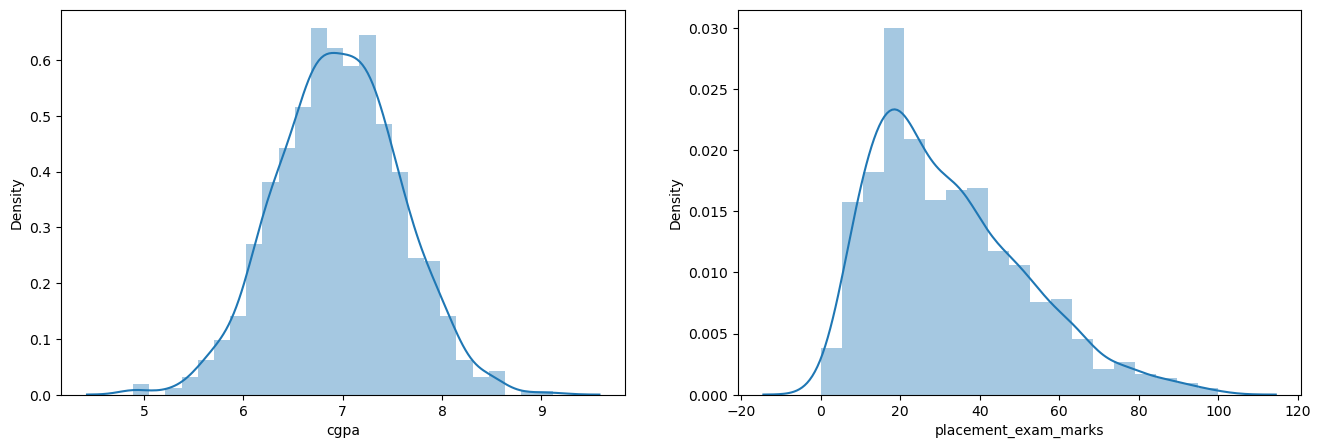

In [4]:
fig = plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

#### We can see the 'cgpa' density plot is normal distribution. Hence, to find out the outliers, we will go for z-score method/treatment.
#### The 'placement_exam_marks' is a bit skewed distribution. Hence, to find out the outliers, we go for the IQR/Boxplot method

### Let's detect the outlier present in the "CGPA" feature.
+ <b> As we know the z-score condition of finding out the outliers is = (mean + 3*SD, mean-3*SD). Hence, we will find out the mean & standard deviation for the "CGPA" column.

In [5]:
cgpa_mean = df['cgpa'].mean()
cgpa_sd = df['cgpa'].std()

In [6]:
z_score_upper_limit = cgpa_mean + (3*cgpa_sd)
z_score_lower_limit = cgpa_mean - (3*cgpa_sd)

In [7]:
print("The lower limit",z_score_lower_limit)
print('The upper limit', z_score_upper_limit)

The lower limit 5.113546374602832
The upper limit 8.808933625397168


### <b>Detecting outliers

In [8]:
df[(df['cgpa']>z_score_upper_limit)]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [9]:
df[df['cgpa']<z_score_lower_limit]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### <b> 1. Trimming / removing the outliers

In [10]:
df.shape

(1000, 3)

In [11]:
df_z_score_trimmed = df[(df['cgpa']<z_score_upper_limit) & (df['cgpa']>z_score_lower_limit)]
df_z_score_trimmed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### <b> 2. Capping the outliers / converting the outliers in terms of z_score upper limit value & lower limit value

In [12]:
df_backup = df

In [13]:
print("The lower limit",z_score_lower_limit)
print('The upper limit', z_score_upper_limit)

The lower limit 5.113546374602832
The upper limit 8.808933625397168


In [14]:
df_backup[df_backup['cgpa']>z_score_upper_limit]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [15]:
df_backup[df_backup['cgpa']<z_score_lower_limit]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [16]:
df_backup['cgpa'] = np.where(
    df_backup['cgpa']<z_score_lower_limit,
    z_score_lower_limit,
    np.where(df_backup['cgpa']>z_score_upper_limit,
    z_score_upper_limit,
    df_backup['cgpa']))

In [17]:
# type(df_z_score_capping

In [18]:
# count = 0
# for i in df_z_score_capping:
#     if i>z_score_upper_limit or i<z_score_lower_limit:
#         count = count + 1
#         print('Outlier detected')
        
# if count==0:
#     print('No outlier found')

#### Now let's see how the capped column ('CGPA') distribution looks like after capping

In [19]:
df_backup.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [20]:
df_backup[(df_backup['cgpa']>z_score_upper_limit) | (df_backup['cgpa']<z_score_lower_limit)]

,cgpa,placement_exam_marks,placed


/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/1462334369.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'], label='before the outlier is handled')
/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/1462334369.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

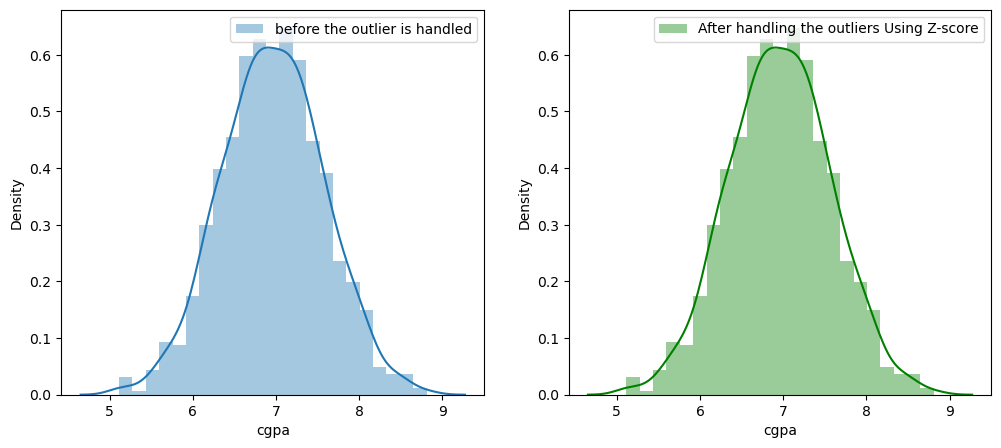

In [21]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'], label='before the outlier is handled')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(df_backup['cgpa'], label='After handling the outliers Using Z-score', color='green')
plt.legend()

In [22]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


In [23]:
df_backup.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


### Now let's detect & handle the outlier present in the "placement_exam_marks" column
+ <b> so here we will be using IQR(Inter Quartile Range) method to detect & handle the outliers

In [24]:
df_backup_2 = df

In [25]:
df_backup_2['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/1650627607.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_backup_2['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

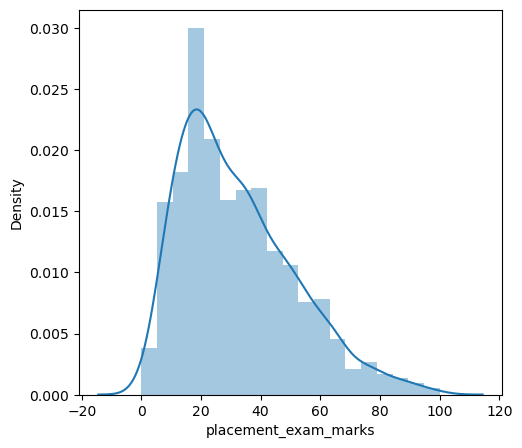

In [26]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_backup_2['placement_exam_marks'])

In [27]:
df_backup_2['cgpa'].skew()

-0.003704380991302917

In [28]:
df_backup_2['placement_exam_marks'].skew()

0.8356419499466834

#### We can see cgpa column has very less value in terms of skewness & the placement_exam_marks has  moderate skewness. Hence, we will using IQR method to detect the outliers datapoints & will handle it.

[]

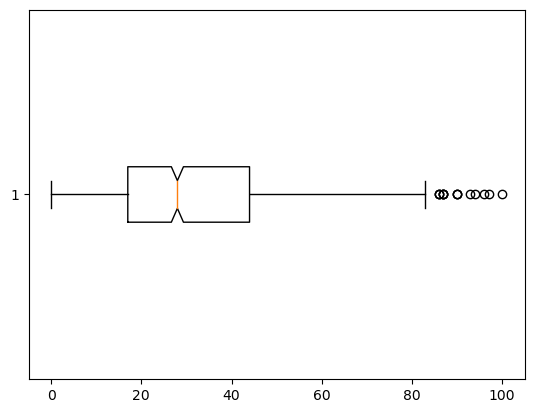

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df_backup_2['placement_exam_marks'], notch=True, vert=False)
ax.plot()

<Axes: >

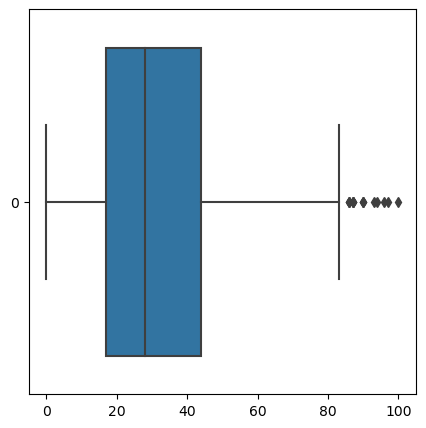

In [30]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(df_backup_2['placement_exam_marks'], orient='h')

           Q1-1.5IQR   Q1   median Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

#### If the datapoint is beyond Q1-1.5IQR & Q3+1.5IQR, then that datapoint is classified as outlier/flier

In [31]:
## Now let's find the Q1, Q3, IQR in-order to find the IQR(Q1-1.5IQR<x<Q3+1.5IQR) range.
type(df_backup_2['placement_exam_marks'].describe())

pandas.core.series.Series

In [32]:
Q1_25thpercentile = df_backup_2['placement_exam_marks'].describe()['25%']

In [33]:
Q3_75thpercentile = df_backup_2['placement_exam_marks'].describe()['75%']

In [34]:
# sns.distplot(df_backup_2['placement_exam_marks'])

In [35]:
IQR = Q3_75thpercentile-Q1_25thpercentile

In [36]:
IQR

27.0

In [37]:
IQR_upper_limit = Q3_75thpercentile + 1.5*IQR
IQR_lower_limit = Q1_25thpercentile - 1.5*IQR
print('UPPER LIMIT', IQR_upper_limit)
print('LOWER LIMIT', IQR_lower_limit)

UPPER LIMIT 84.5
LOWER LIMIT -23.5


In [38]:
df_backup_2[df_backup_2['placement_exam_marks']>IQR_upper_limit].shape

(15, 3)

In [39]:
df_backup_2[df_backup_2['placement_exam_marks']<IQR_lower_limit]

,cgpa,placement_exam_marks,placed


#### Now we have found out the outliers based on the IQR method. As a next step we need to handle those outliers i.e. either remove those or cap those.

### <b>1. Trimming

In [40]:
df_backup_2_trimmed = df_backup_2[(df_backup_2['placement_exam_marks']<IQR_upper_limit) & (df_backup_2['placement_exam_marks']>IQR_lower_limit)]

In [42]:
df_backup_2_trimmed.shape

(985, 3)

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/1728478791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_backup_2['placement_exam_marks'], label='Before trimming')
/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/1728478791.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

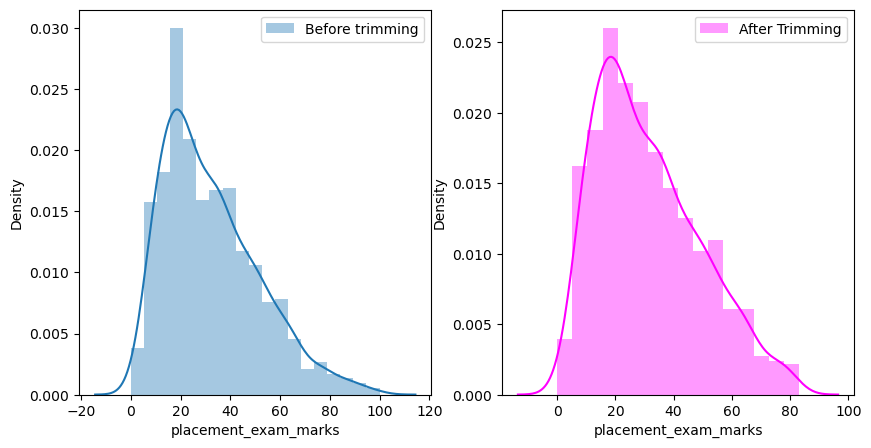

In [51]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_backup_2['placement_exam_marks'], label='Before trimming')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(df_backup_2_trimmed['placement_exam_marks'], label='After Trimming', color='magenta')
plt.legend()

In [54]:
# fig = plt.figure(figsize=(10,5))
# ax1 = plt.subplot(1,2,1)
# ax1.plot(df_backup_2_trimmed['placement_exam_marks'],)

In [56]:
df_backup_2.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


In [55]:
df_backup_2_trimmed.describe()

,cgpa,placement_exam_marks,placed
count,985.000000,985.000000,985.00000
mean,6.961856,31.339086,0.48934
std,0.611469,17.857633,0.50014
min,5.113546,0.000000,0.00000
25%,6.550000,17.000000,0.00000
50%,6.960000,28.000000,0.00000
75%,7.370000,43.000000,1.00000
max,8.808934,83.000000,1.00000


#### Visulalizing using the boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x146509b50>,
 'caps': [<matplotlib.lines.Line2D at 0x145759c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x154506410>],
 'medians': [<matplotlib.lines.Line2D at 0x147173390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1541f3f10>],
 'means': []}

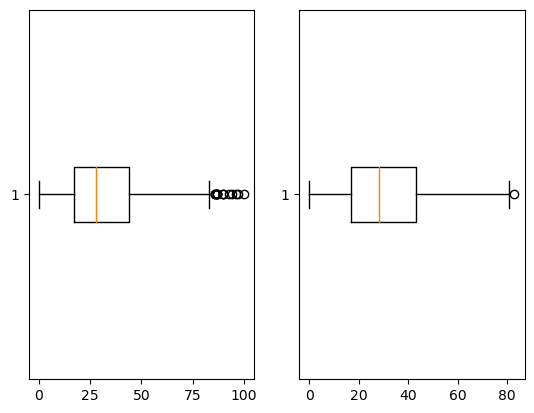

In [116]:
fig = plt.figure()
ax1 = plt.subplot(1,2,1)
ax1.boxplot(df['placement_exam_marks'], vert=False)

ax2 = plt.subplot(1,2,2)
ax2.boxplot(df_backup_2_trimmed['placement_exam_marks'],vert=False)

In [111]:
IQR_upper_limit

84.5

In [114]:
df_backup_2_trimmed[df_backup_2_trimmed['placement_exam_marks']>=IQR_upper_limit]

,cgpa,placement_exam_marks,placed


### 2. Capping

#### For capping we will replace the outlier values with the upper limit & lower limit values

Q1, Q3, IQR??

In [61]:
Q1 = df['placement_exam_marks'].quantile(0.25)

In [59]:
Q3 = df['placement_exam_marks'].quantile(0.75)

In [62]:
Q1

17.0

In [63]:
Q3

44.0

In [65]:
IQR = Q3-Q1

In [90]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [75]:
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

In [80]:
upper_limit

84.5

In [81]:
lower_limit

-23.5

In [91]:
df_exam_marks_capping = df

In [88]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.0,1000.000000
mean,6.961499,-23.5,0.489000
std,0.612688,0.0,0.500129
min,5.113546,-23.5,0.000000
25%,6.550000,-23.5,0.000000
50%,6.960000,-23.5,0.000000
75%,7.370000,-23.5,1.000000
max,8.808934,-23.5,1.000000


#### Now we got the upper limit & lower limit for thr outlier detection. So now we will replace the outlier values with the boundary values

<b> Method.1

In [92]:
df_exam_marks_capping['placement_exam_marks'] = np.where(
                                                    df_exam_marks_capping['placement_exam_marks']>upper_limit,
                                                    upper_limit,
                                                    np.where(
                                                        df_exam_marks_capping['placement_exam_marks']<lower_limit,
                                                        lower_limit,
                                                        df_exam_marks_capping['placement_exam_marks']
                                                    )
                                                )

In [93]:
df_exam_marks_capping.shape

(1000, 3)

In [94]:
df_exam_marks_capping.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

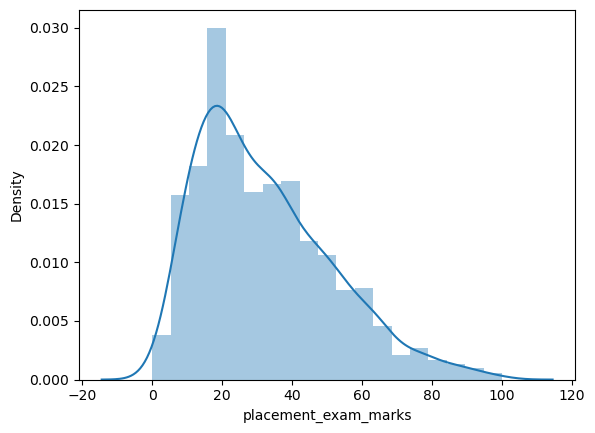

In [100]:
sns.distplot(df['placement_exam_marks'])

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/2666578488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_exam_marks_capping['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

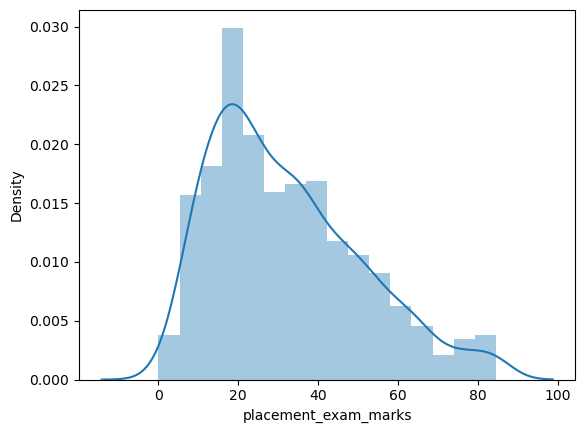

In [98]:
sns.distplot(df_exam_marks_capping['placement_exam_marks'])

#### Visulaizing by drawing boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x153fde7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x153fdfe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x153fddb90>],
 'medians': [<matplotlib.lines.Line2D at 0x153fe9490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1475ea810>],
 'means': []}

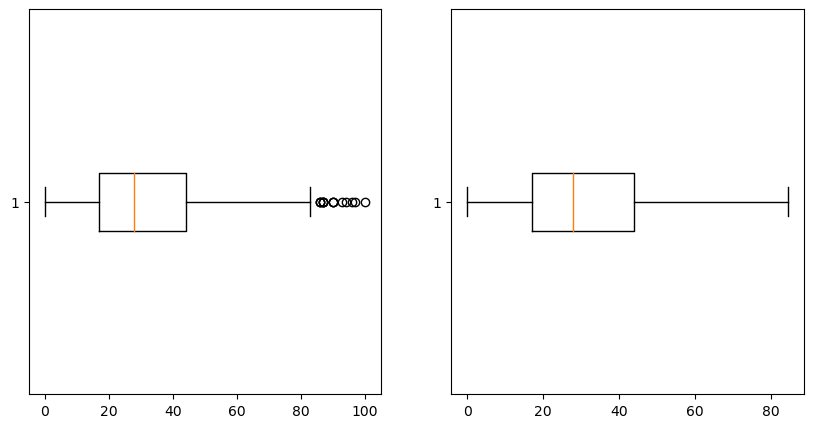

In [106]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)

ax1.boxplot(df['placement_exam_marks'], vert=False)

ax2 = plt.subplot(1,2,2)
ax2.boxplot(df_exam_marks_capping['placement_exam_marks'], vert=False)

<b> Method.2

In [119]:
# df.describe()

In [127]:
df_exam_marks_capping_2 = df

In [128]:
df_exam_marks_capping_2.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [129]:
df_exam_marks_capping_2['placement_exam_marks'][df_exam_marks_capping_2['placement_exam_marks']>upper_limit] = upper_limit 
df_exam_marks_capping_2['placement_exam_marks'][df_exam_marks_capping_2['placement_exam_marks']<lower_limit] = lower_limit

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/461511874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exam_marks_capping_2['placement_exam_marks'][df_exam_marks_capping_2['placement_exam_marks']>upper_limit] = upper_limit
/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_5724/461511874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exam_marks_capping_2['placement_exam_marks'][df_exam_marks_capping_2['placement_exam_marks']<lower_limit] = lower_limit


In [130]:
df_exam_marks_capping_2.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000
